In [ ]:
!pip install requests matplotlib


In [4]:
import requests
import time
import matplotlib.pyplot as plt

data_points = []

for i in range(100):
    try:
        res = requests.get("http://api.open-notify.org/iss-now.json", timeout=10)

        if res.status_code == 200:
            d = res.json()

            if 'iss_position' in d and 'timestamp' in d:
                lat = float(d['iss_position']['latitude'])
                lon = float(d['iss_position']['longitude'])
                timestamp = d['timestamp']
                data_points.append((timestamp, lat, lon))
                print(f"{i+1}/100: ({lat}, {lon}) at {timestamp}")
            else:
                print(f"{i+1}/100: Missing keys in response -> {d}")
        else:
            print(f"{i+1}/100: API returned status code {res.status_code}")

    except requests.exceptions.RequestException as e:
        print(f"{i+1}/100: Request error -> {e}")
    except Exception as e:
        print(f"{i+1}/100: Unexpected error -> {e}")

    time.sleep(10)

1/100: (-29.9755, 85.7149) at 1751716721
2/100: (-29.5233, 86.2055) at 1751716731
3/100: (-29.0689, 86.6913) at 1751716741
4/100: (-28.269, 87.5305) at 1751716759
5/100: (-27.486, 88.3327) at 1751716776
6/100: (-26.6976, 89.1225) at 1751716793
7/100: (-26.233, 89.58) at 1751716803
8/100: (-25.7651, 90.035) at 1751716813
9/100: Request error -> HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7bfe6d7a4890>, 'Connection to api.open-notify.org timed out. (connect timeout=10)'))
10/100: (-24.3516, 91.377) at 1751716843
11/100: (-23.8773, 91.8169) at 1751716853
12/100: (-23.4015, 92.2534) at 1751716863
13/100: (-22.5652, 93.0091) at 1751716880
14/100: (-22.0855, 93.4364) at 1751716890
15/100: (-21.6044, 93.8604) at 1751716900
16/100: (-21.0737, 94.3234) at 1751716911
17/100: (-20.59, 94.741) at 1751716921
18/100: (-20.1049, 95.1559) at 1751716931
19/100: (-19.61

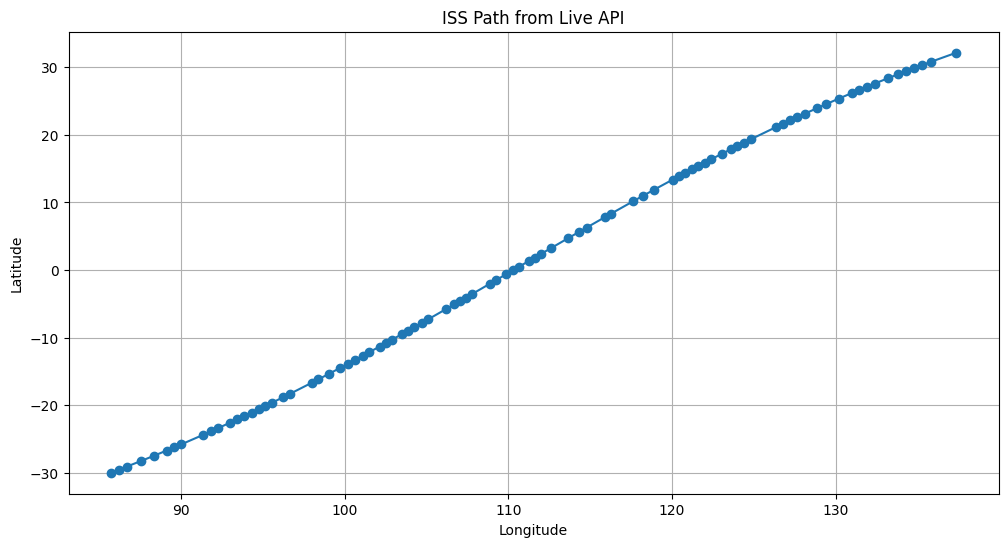

In [7]:
if data_points:
    timestamps, latitudes, longitudes = zip(*data_points)

    plt.figure(figsize=(12, 6))
    plt.title("ISS Path from Live API")
    plt.plot(longitudes, latitudes, marker='o', linestyle='-')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)


    plt.show()
else:
    print("No valid data collected. Check your network or the API.")
